# Train-Test Split of heating data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [2]:
#use csv with already preprocessed features (scaling, differnecing etc needed)
df = pd.read_csv("Data_Prep.csv", index_col=0)

### some small data checks

In [3]:
df

,Total_Heat,Hour,Day,Month,Year,Weekday,Weekend,Holiday
2008-01-01 00:00:00+00:00,98086.0,0,1,1,2008,1,0,1
2008-01-01 01:00:00+00:00,100454.0,1,1,1,2008,1,0,1
2008-01-01 02:00:00+00:00,107183.0,2,1,1,2008,1,0,1
2008-01-01 03:00:00+00:00,120688.0,3,1,1,2008,1,0,1
2008-01-01 04:00:00+00:00,158569.0,4,1,1,2008,1,0,1
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00+00:00,153908.0,19,31,12,2014,2,0,0
2014-12-31 20:00:00+00:00,139544.0,20,31,12,2014,2,0,0
2014-12-31 21:00:00+00:00,114048.0,21,31,12,2014,2,0,0
2014-12-31 22:00:00+00:00,71690.5,22,31,12,2014,2,0,0


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
df_scaler = MinMaxScaler()
df.Total_Heat = df_scaler.fit_transform(df[["Total_Heat"]])


In [6]:
df

,Total_Heat,Hour,Day,Month,Year,Weekday,Weekend,Holiday
2008-01-01 00:00:00+00:00,0.362881,0,1,1,2008,1,0,1
2008-01-01 01:00:00+00:00,0.371961,1,1,1,2008,1,0,1
2008-01-01 02:00:00+00:00,0.397763,2,1,1,2008,1,0,1
2008-01-01 03:00:00+00:00,0.449547,3,1,1,2008,1,0,1
2008-01-01 04:00:00+00:00,0.594798,4,1,1,2008,1,0,1
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00+00:00,0.576926,19,31,12,2014,2,0,0
2014-12-31 20:00:00+00:00,0.521848,20,31,12,2014,2,0,0
2014-12-31 21:00:00+00:00,0.424086,21,31,12,2014,2,0,0
2014-12-31 22:00:00+00:00,0.261670,22,31,12,2014,2,0,0


In [7]:
df.index = pd.DatetimeIndex(df.index)

In [8]:
df.groupby(df.index.floor('d')).count().value_counts()

Total_Heat  Hour  Day  Month  Year  Weekday  Weekend  Holiday
24          24    24   24     24    24       24       24         2557
dtype: int64

In [9]:
# removing the 2 values from first year if necessary
np_array = df.Total_Heat.to_numpy()

In [10]:
np_array[:10]

array([0.36288133, 0.37196123, 0.397763  , 0.44954677, 0.59479823,
       0.70574319, 0.68270219, 0.68017914, 0.65285127, 0.62472584])

## Creating input X and target y

In [11]:
# Hyperparameter
train_days = 30
forecast_days = 2

In [12]:
len(np_array[train_days*24:-forecast_days*24])

60600

Possibility 1

In [10]:
# creating tuples with x and y
arr = [
    (np_array[i-train_days*24:i], np_array[i:i+forecast_days*24]) for 
    i  in range(train_days*24, len(np_array)-forecast_days*24)
    ]

Possibility 2

In [13]:
# creating two seperate lists with a function

def create_X_y(data_array: np.array, train_days:int, forecast_days:int):
    """"""
    X_list = []
    y_list = []

    for i in range(train_days*24, len(data_array)-forecast_days*24, 24):
        X_list.append(data_array[i-train_days*24:i])
        y_list.append(data_array[i:i+forecast_days*24])
    
    return X_list, y_list
    

In [14]:
X_list, y_list = create_X_y(np_array, train_days, forecast_days)

In [15]:
len(X_list), len(y_list)

(2525, 2525)

## Data split in train, eval, test

Should decide that on a portion of data which is not for hyperparam tuning, but is only used at the very end.  (Test-data)
-> Maybe last year of data

Could decide that one portion of data will be used for hyperparam tuning, but not for training of data. (eval-data)
-> Maybe second last year

In [41]:
np_test = np_array[-365*24-train_days*24-forecast_days*24:]
np_eval = np_array[-365*24*2:-365*24]
np_train = np_array[:-365*24*2]
len(np_test), len(np_eval), len(np_train)

(9528, 8760, 43848)

# Testing ARIMA

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
df["Total_Heat_daily_diff"] = np.log2(df.Total_Heat)

In [18]:
df_small = df.Total_Heat.iloc[:-365*24*2]
df_small.head()

2008-01-01 00:00:00+00:00    0.362881
2008-01-01 01:00:00+00:00    0.371961
2008-01-01 02:00:00+00:00    0.397763
2008-01-01 03:00:00+00:00    0.449547
2008-01-01 04:00:00+00:00    0.594798
Name: Total_Heat, dtype: float64

<AxesSubplot:>

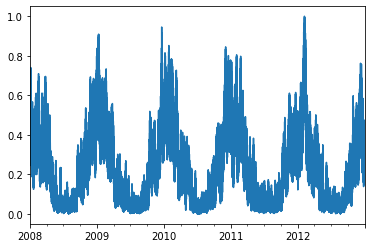

In [19]:
df_small.plot()

In [20]:
import itertools

In [21]:
import warnings

In [22]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

In [25]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(df_small,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)12 - AIC:365068.0495737295
ARIMA(0, 0, 0)x(0, 0, 1, 24)12 - AIC:304496.00027046574
ARIMA(0, 0, 0)x(0, 1, 0, 24)12 - AIC:-11445.302040344774
ARIMA(0, 0, 0)x(0, 1, 1, 24)12 - AIC:-29762.590928906502
ARIMA(0, 0, 0)x(1, 0, 0, 24)12 - AIC:-11448.069021980515
ARIMA(0, 0, 0)x(1, 0, 1, 24)12 - AIC:-29796.491836634596
ARIMA(0, 0, 0)x(1, 1, 0, 24)12 - AIC:-25028.857708794232
ARIMA(0, 0, 0)x(1, 1, 1, 24)12 - AIC:-30558.1654242953
ARIMA(0, 0, 1)x(0, 0, 0, 24)12 - AIC:304905.1483777455
ARIMA(0, 0, 1)x(0, 0, 1, 24)12 - AIC:244479.51167597336
ARIMA(0, 0, 1)x(0, 1, 0, 24)12 - AIC:-56312.00936652609
ARIMA(0, 0, 1)x(0, 1, 1, 24)12 - AIC:-68461.1250554176
ARIMA(0, 0, 1)x(1, 0, 0, 24)12 - AIC:-10710.025830676495
ARIMA(0, 0, 1)x(1, 0, 1, 24)12 - AIC:-27920.468144691942
ARIMA(0, 0, 1)x(1, 1, 0, 24)12 - AIC:-65501.992209172
ARIMA(0, 0, 1)x(1, 1, 1, 24)12 - AIC:-68681.07849676831
ARIMA(0, 1, 0)x(0, 0, 0, 24)12 - AIC:-6027.139007366087
ARIMA(0, 1, 0)x(0, 0, 1, 24)12 - AIC:-55795.638

MemoryError: Unable to allocate 870. MiB for an array with shape (51, 51, 43848) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 988, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 870. MiB for an array with shape (51, 51, 43848) and data type float64


ARIMA(1, 0, 0)x(0, 0, 0, 24)12 - AIC:-6028.624393697981
ARIMA(1, 0, 0)x(0, 0, 1, 24)12 - AIC:-55797.98339951165
ARIMA(1, 0, 0)x(0, 1, 0, 24)12 - AIC:-129571.35392946772
ARIMA(1, 0, 0)x(0, 1, 1, 24)12 - AIC:-129486.05763116258
ARIMA(1, 0, 0)x(1, 0, 0, 24)12 - AIC:-129683.63367474225
ARIMA(1, 0, 0)x(1, 0, 1, 24)12 - AIC:-129693.09871939302
ARIMA(1, 0, 0)x(1, 1, 0, 24)12 - AIC:-129480.08388061254
ARIMA(1, 0, 0)x(1, 1, 1, 24)12 - AIC:-135315.32398123902
ARIMA(1, 0, 1)x(0, 0, 0, 24)12 - AIC:-30973.2573950086
ARIMA(1, 0, 1)x(0, 0, 1, 24)12 - AIC:-72276.04465769794
ARIMA(1, 0, 1)x(0, 1, 0, 24)12 - AIC:-129567.11866998687
ARIMA(1, 0, 1)x(0, 1, 1, 24)12 - AIC:-129482.05013878272
ARIMA(1, 0, 1)x(1, 0, 0, 24)12 - AIC:-129685.04288216753
ARIMA(1, 0, 1)x(1, 0, 1, 24)12 - AIC:-129690.9283232715
ARIMA(1, 0, 1)x(1, 1, 0, 24)12 - AIC:-129479.90831607608
ARIMA(1, 0, 1)x(1, 1, 1, 24)12 - AIC:-135320.54996058595
ARIMA(1, 1, 0)x(0, 0, 0, 24)12 - AIC:-33825.036501789386
ARIMA(1, 1, 0)x(0, 0, 1, 24)12 - AIC:

MemoryError: Unable to allocate 870. MiB for an array with shape (51, 51, 43848) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 1000, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 870. MiB for an array with shape (51, 51, 43848) and data type float64


ARIMA(1, 0, 0)x(1, 1, 1, 24)12 - AIC:-135315.32398123902

ARIMA(1, 0, 1)x(1, 1, 1, 24)12 - AIC:-135320.54996058595

ARIMA(1, 0, 1)x(1, 1, 1, 24)12 - AIC:-135320.54996058595


ARIMA(1, 0, 0)x(0, 0, 1, 24)

In [48]:
optimal_order = (1, 0, 1)
optimal_seasonal_order = (1, 1, 1, 24)

In [32]:
mod =SARIMAX(df_small,
                                order=optimal_order,
                                seasonal_order=optimal_seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

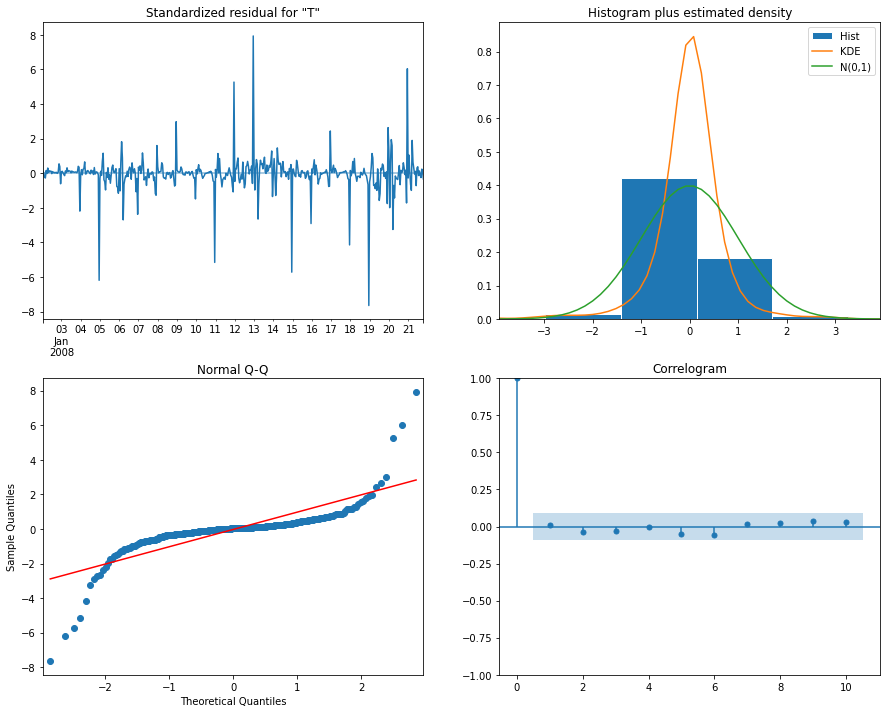

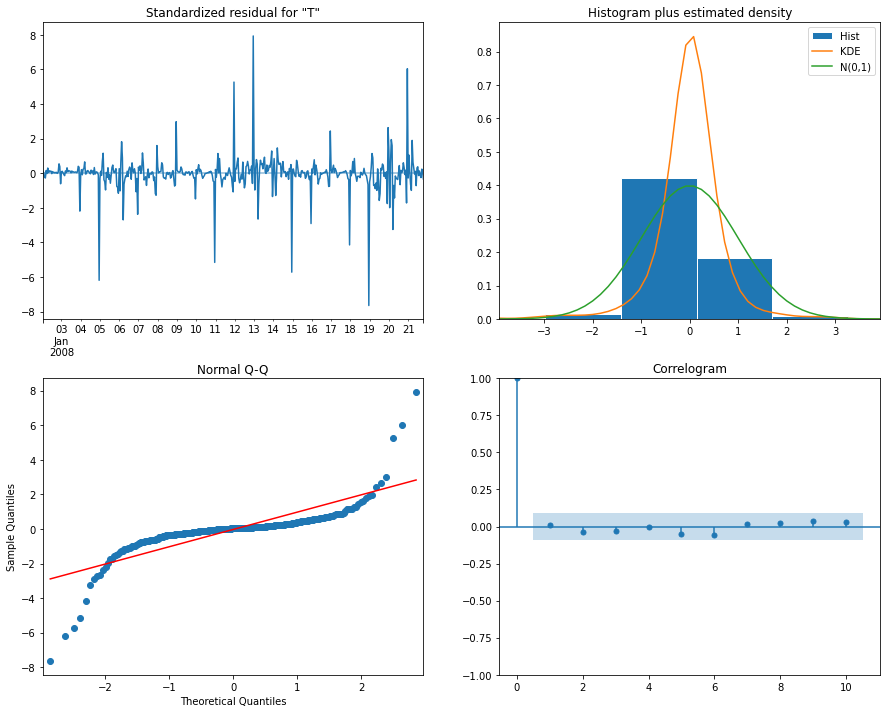

In [ ]:
results.plot_diagnostics(figsize=(15, 12))

Iteratively go through the eval data to calaculate mean loss

In [42]:
X_list, y_list = create_X_y(np_test, train_days, forecast_days)
mse_dict={}

In [44]:
X_list[0]

array([0.24370773, 0.25287965, 0.27394209, 0.3242151 , 0.45037501,
       0.53725134, 0.51281078, 0.49686728, 0.47259927, 0.4473995 ,
       0.4344085 , 0.41851485, 0.40913971, 0.40777466, 0.41766361,
       0.4390213 , 0.45833525, 0.46399485, 0.45927085, 0.44470774,
       0.40552769, 0.32047271, 0.257688  , 0.23322827, 0.24597386,
       0.24364637, 0.2687963 , 0.3305994 , 0.45841577, 0.50603537,
       0.47779874, 0.46262979, 0.44183193, 0.41899799, 0.40667802,
       0.39439639, 0.39033958, 0.39877529, 0.40751392, 0.42504103,
       0.44655976, 0.45256062, 0.45017945, 0.44002592, 0.39884814,
       0.31561834, 0.25589733, 0.24794475, 0.25683676, 0.26374254,
       0.28692158, 0.33284636, 0.45421709, 0.53943312, 0.52175263,
       0.51053314, 0.49045614, 0.46862682, 0.44775227, 0.43398672,
       0.43322367, 0.43618767, 0.44397153, 0.46084296, 0.47629181,
       0.47919447, 0.47373809, 0.45368794, 0.41221875, 0.32475958,
       0.2645401 , 0.2822781 , 0.29401908, 0.30142717, 0.32493

In [45]:
y_list[0]

array([0.24598153, 0.25255755, 0.27585929, 0.32270817, 0.44075829,
       0.52359315, 0.50704382, 0.49502293, 0.47400267, 0.45201614,
       0.43120293, 0.41830013, 0.41709996, 0.42009847, 0.42793985,
       0.44482277, 0.4602678 , 0.46422875, 0.45963128, 0.4406701 ,
       0.3997569 , 0.31332919, 0.25371171, 0.25537201, 0.26669504,
       0.27337843, 0.29641559, 0.34540024, 0.4692595 , 0.55795334,
       0.543141  , 0.53122364, 0.50736974, 0.48231951, 0.46061289,
       0.44789414, 0.44491096, 0.44889876, 0.45741883, 0.47569748,
       0.48794077, 0.48877667, 0.48425973, 0.46889906, 0.42316217,
       0.33321063, 0.27032623, 0.27032623])

In [46]:
len(y_list)

365

In [49]:
mse_list = []
for X, y in zip(X_list, y_list):
    mod =SARIMAX(X,
                                order=optimal_order,
                                seasonal_order=optimal_seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    fitted_model = mod.fit()

    forecast = fitted_model.forecast(steps=48)

    mse = ((forecast - y) ** 2).mean()
    mse_list.append(mse)


mse_dict[f"SARIMAX{(1, 0, 0)}x{(1, 0, 1, 24)}"] = np.array(mse_list).mean()


c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Lik

In [36]:

mse_dict[f"SARIMAX{(1, 0, 0)}x{(1, 0, 1, 24)}"] = np.array(mse_list).mean()

In [50]:
mse_dict

{'SARIMAX(1, 0, 0)x(1, 0, 1, 24)': 0.0008692357285921017}

In [45]:
len(mse_list)

333

In [46]:
forecast

array([0.21519435, 0.21994542, 0.24196384, 0.29270729, 0.40046144,
       0.47415714, 0.45740464, 0.44170217, 0.4155494 , 0.39060781,
       0.37555757, 0.36391964, 0.35571235, 0.35653149, 0.36599043,
       0.38340926, 0.40064053, 0.40755813, 0.40556589, 0.39419348,
       0.35635775, 0.2787879 , 0.22072967, 0.21087224, 0.22289411,
       0.2275307 , 0.24949128, 0.29993342, 0.40841057, 0.48276028,
       0.46646021, 0.45155178, 0.42565871, 0.40117881, 0.38484149,
       0.37323651, 0.36671486, 0.36859696, 0.37738301, 0.39445604,
       0.41075759, 0.41665539, 0.41465201, 0.40257553, 0.36400402,
       0.28474212, 0.22691071, 0.21233845])

In [47]:
y

array([0.21741131, 0.21214666, 0.23740011, 0.29898081, 0.41939677,
       0.46128392, 0.43544763, 0.41637909, 0.39499072, 0.371758  ,
       0.35964892, 0.34891639, 0.34435344, 0.3527048 , 0.35996334,
       0.37893603, 0.40015951, 0.40742956, 0.40762512, 0.40018635,
       0.36068421, 0.28401509, 0.2237726 , 0.23658722, 0.24598153,
       0.25255755, 0.27585929, 0.32270817, 0.44075829, 0.52359315,
       0.50704382, 0.49502293, 0.47400267, 0.45201614, 0.43120293,
       0.41830013, 0.41709996, 0.42009847, 0.42793985, 0.44482277,
       0.4602678 , 0.46422875, 0.45963128, 0.4406701 , 0.3997569 ,
       0.31332919, 0.25371171, 0.25537201])

In [48]:
df_show = pd.DataFrame({"Forecast": forecast, "Actual": y})

<AxesSubplot:>

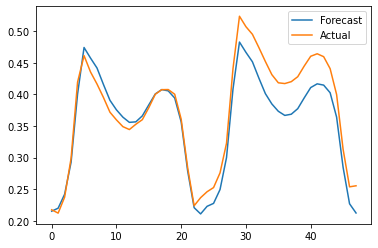

In [49]:
df_show.plot()

In [39]:
pred = results.get_prediction(start=df_small.index[22*15], dynamic=True)

NameError: name 'results' is not defined

In [28]:
pred_ci = pred.conf_int()

In [29]:
import matplotlib.pyplot as plt

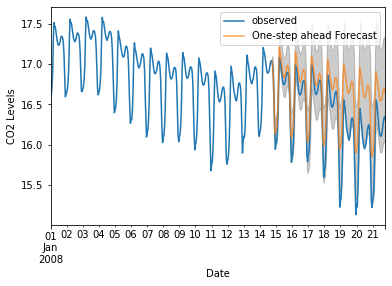

In [30]:
ax = df_small.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [35]:
y_forecasted = 2**pred.predicted_mean
y_truth = 2**df_small.iloc[24*15:24*17]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 108882153.16


In [36]:
y_truth

2008-01-16 00:00:00+00:00     59471.0
2008-01-16 01:00:00+00:00     60879.0
2008-01-16 02:00:00+00:00     67250.0
2008-01-16 03:00:00+00:00     81177.0
2008-01-16 04:00:00+00:00    109471.0
2008-01-16 05:00:00+00:00    130250.0
2008-01-16 06:00:00+00:00    127015.0
2008-01-16 07:00:00+00:00    123653.0
2008-01-16 08:00:00+00:00    115791.0
2008-01-16 09:00:00+00:00    109058.0
2008-01-16 10:00:00+00:00    103716.0
2008-01-16 11:00:00+00:00    101085.0
2008-01-16 12:00:00+00:00    100545.0
2008-01-16 13:00:00+00:00    101625.0
2008-01-16 14:00:00+00:00    104016.0
2008-01-16 15:00:00+00:00    108391.0
2008-01-16 16:00:00+00:00    112416.0
2008-01-16 17:00:00+00:00    113638.0
2008-01-16 18:00:00+00:00    113606.0
2008-01-16 19:00:00+00:00    110169.0
2008-01-16 20:00:00+00:00     99321.0
2008-01-16 21:00:00+00:00     76668.0
2008-01-16 22:00:00+00:00     61237.0
2008-01-16 23:00:00+00:00     56657.0
2008-01-17 00:00:00+00:00     59733.0
2008-01-17 01:00:00+00:00     61113.0
2008-01-17 0

In [58]:
my_arma = SARIMAX(df_small, order=(3,1,1), seasonal_order=() freq='')

c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\jabbe\Envs\idw\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [59]:
results = my_arma.fit()

In [60]:
results.aic

-798.5316599192159

In [20]:
y_list[0]

array([ 55417.,  56691.,  62289.,  75539., 102085., 123732., 120589.,
       117151., 109552., 103416.,  98390.,  95563.,  94712.,  95999.,
        98204., 102182., 105845., 107665., 107485., 104103.,  93909.,
        72672.,  57822.,  55429.,  57493.,  59247.,  65173.,  78972.,
       108795., 129002., 123673., 119323., 112293., 105367., 102149.,
        98797.,  95993.,  95583.,  98739., 103934., 109241., 111631.,
       110941., 107896.,  97875.,  77134.,  61094.,  67292.])

In [21]:
my_arma = ARIMA(X_list[0], order=(1,1,1))

In [22]:
result = my_arma.fit()

In [23]:
result.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.3534,0.028,12.604,0.000,0.298,0.408
ma.L1,0.3728,0.044,8.506,0.000,0.287,0.459
sigma2,7.152e+07,7.65e-11,9.34e+17,0.000,7.15e+07,7.15e+07


In [24]:
pred = result.get_prediction()

In [31]:
pred.predicted_mean

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [94]:
pred.conf_int()

array([[-21075.4521082 ,  21075.4521082 ],
       [138028.65849761, 172111.88649799],
       [ 65390.66582702,  98665.8538655 ],
       [102284.95326535, 135453.23581224],
       [109561.5370232 , 142715.06049748],
       [167469.57319444, 200621.04732931],
       [182442.20477438, 215593.39412615],
       [156261.85102858, 189413.00080156],
       [167009.76074292, 200160.9050152 ],
       [150932.70453748, 184083.84804528],
       [146783.24808857, 179934.39149012],
       [139412.06020236, 172563.20358913],
       [137627.29999141, 170778.44337613],
       [136775.4839316 , 169926.62731604],
       [140535.52298723, 173686.66637163],
       [142794.74233613, 175945.88572053],
       [150652.23581393, 183803.37919832],
       [151025.47035071, 184176.61373511],
       [149091.00283801, 182242.1462224 ],
       [146220.2058635 , 179371.34924789],
       [137674.4621589 , 170825.6055433 ],
       [117183.98048603, 150335.12387043],
       [ 85382.50671314, 118533.65009753],
       [ 74